In [107]:
#https://www.kaggle.com/datasets/akram24/social-network-ads?datasetId=20757&searchQuery=bayes

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
%matplotlib inline
import seaborn as sns #for visualization


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [108]:
data =pd.read_csv('Social_Network_Ads.csv')#pandas kütüphanesini kullanarak dizini atadık
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [109]:
#Veri Keşfi ve Görselleştirme

In [110]:
data.describe()#istatistikler

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [111]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [112]:
data.info()#bellek kullanımı ve veri türleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [113]:
data.head() #ilk 5 satır

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [114]:
data.shape #satır ve sütun sayısı

(400, 5)

In [115]:
data.tail()#son 5 satır

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


array([[<AxesSubplot:title={'center':'User ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Purchased'}>]], dtype=object)

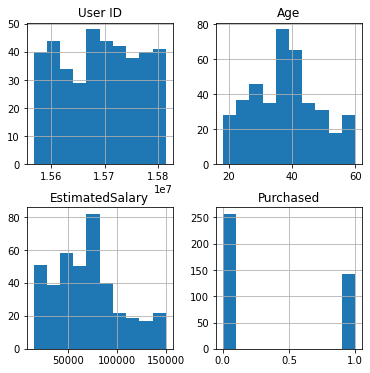

In [116]:
#Histogram chart review
data.hist(figsize=(6,6))

In [117]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


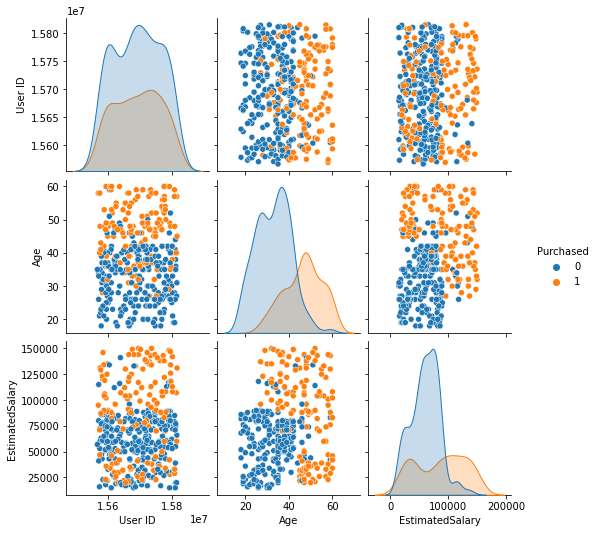

In [118]:
#Korelasyon Gösterim
sns.pairplot(data, hue="Purchased")


We determine the existence, severity and direction of the relationship between two variables by correlation. The correlation coefficient gives us the direction and degree of the relationship. According to these data, Age and Purchased correlation are the same direction and a good correlation. The relationship between Age and User ID attributes is inverse and negligible. .The purpose of correlation analysis; It is to see in which direction the dependent variable will change when the independent variable changes. The presence of a positive relationship indicates that if the values ​​of the X variable increase, the values ​​of the Y variable also increase, or if the values ​​of the X variable decrease, the values ​​of the Y variable tend to decrease. interpreted to increase as well.


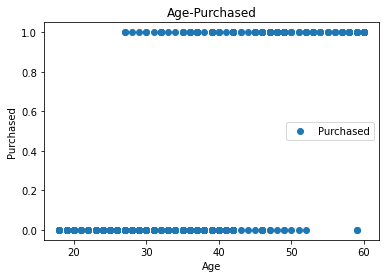

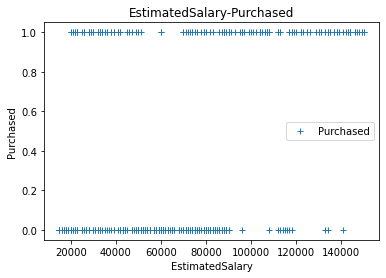

In [119]:
#plotting
data.plot(x='Age', y='Purchased', style='o')  
plt.title('Age-Purchased')  
plt.xlabel('Age')  
plt.ylabel('Purchased')  
plt.show() 

data.plot(x='EstimatedSalary', y='Purchased', style='+')  
plt.title('EstimatedSalary-Purchased')  
plt.xlabel('EstimatedSalary')  
plt.ylabel('Purchased')  
plt.show()


In [120]:
#Ön İşleme

In [121]:
#Eksik Değer Doldurma
#Null olan öznitelikleri buluyoruz
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [122]:
#Null olan özniteliklere sahip, toplam kayıt sayısını buluyoruz
data.isnull().sum().sum()

0

In [123]:
#Eksik değer tablosu
def eksik_deger_tablosu(data): 
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum()/len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing', 1 : '% value'})
    return mis_val_table_ren_columns

In [124]:
eksik_deger_tablosu(data)

,Missing,% value
User ID,0,0.0
Gender,0,0.0
Age,0,0.0
EstimatedSalary,0,0.0
Purchased,0,0.0



Some attribute values ​​may not be entered for some observation values. We determine this by detecting missing value.

In [125]:
#Fill Null values ​​in all columns with 'null'
data['User ID'] = data['User ID'].fillna('empty')
data['Gender'] = data['Gender'].fillna('empty')
data['Age'] = data['Age'].fillna('empty')
data['EstimatedSalary'] = data['EstimatedSalary'].fillna('empty')
data['Purchased'] = data['Purchased'].fillna('empty')

data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


C:\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

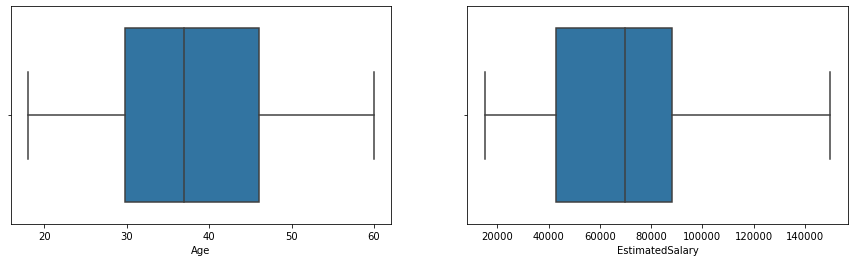

In [126]:
#Outlier (Extreme) Value Detection
Global_Salesfig, axs = plt.subplots(ncols = 2, figsize=(15, 4))
sns.boxplot(data.Age, ax=axs[0], orient = 'h')
sns.boxplot(data.EstimatedSalary, ax=axs[1], orient = 'h', showfliers=False)

As a result of the extreme value determination of the age attribute, it was observed that 60 and 18 were extreme values. The determination was made based on Q1 and Q3. Likewise, Estimated salary was observed in this way and extreme value determination was made.


In [127]:
#We create a new attribute named 'Birthyear' using the age information in the age field
def dogum_yili(age):
    return (2022-age)
data['Birthyear'] = data['Age'].apply(dogum_yili)
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Birthyear
0,15624510,Male,19,19000,0,2003
1,15810944,Male,35,20000,0,1987
2,15668575,Female,26,43000,0,1996
3,15603246,Female,27,57000,0,1995
4,15804002,Male,19,76000,0,2003
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1976
396,15706071,Male,51,23000,1,1971
397,15654296,Female,50,20000,1,1972
398,15755018,Male,36,33000,0,1986


In [128]:
#Data Normalization
from sklearn import preprocessing

#We want to normalize the EstimatedSalary attribute
x = data[['EstimatedSalary']].values.astype(float)

#We use the MinMax normalization method for normalization.
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['EstimatedSalary2'] = pd.DataFrame(x_scaled)
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Birthyear,EstimatedSalary2
0,15624510,Male,19,19000,0,2003,0.029630
1,15810944,Male,35,20000,0,1987,0.037037
2,15668575,Female,26,43000,0,1996,0.207407
3,15603246,Female,27,57000,0,1995,0.311111
4,15804002,Male,19,76000,0,2003,0.451852
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1976,0.192593
396,15706071,Male,51,23000,1,1971,0.059259
397,15654296,Female,50,20000,1,1972,0.037037
398,15755018,Male,36,33000,0,1986,0.133333


In [129]:
#Model Training


In [130]:
# We read our dataset

data=pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [131]:
# We divide the data set into two as testing and training.

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [132]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
# we apply Naive Bayes to the training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [134]:
# We estimate the results using the test dataset.

y_pred = classifier.predict(X_test)

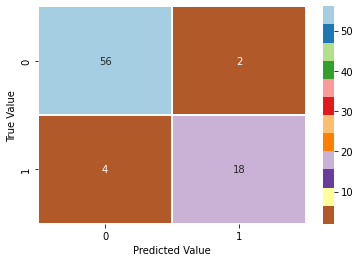

In [140]:
# We create our confusion matrix.

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


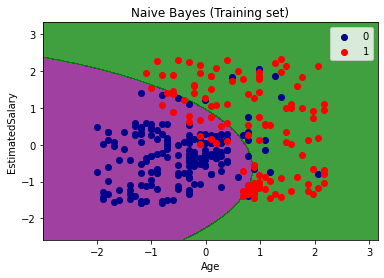

In [136]:
# We observe training results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkblue', 'red'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


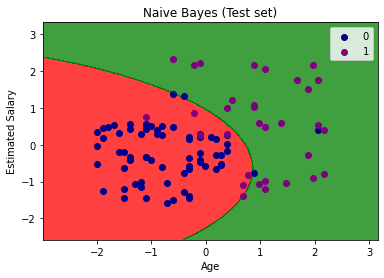

In [137]:
# We are observing the test results.

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkblue', 'purple'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

With the Naive Bayes classification, 75 percent of the data is used as training data, while 25 percent is reserved as test data. The attributes that define the samples in the dataset are conditionally independent with each other according to the hypothesis given. As a result, this modeling is trained and the data is tested, and the data is used in social networks at any age and salary. It can be predicted whether the applications are purchased or not.


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80

[[56  2]
 [ 4 18]]
ACC:  0.925
